# 📌 Week 3 시계열 데이터 과제

- **구성:** 이론 + 실습  
- **이론:** 정규 세션 핵심 내용 기반 주관식 문제(총 2문제)
- **실습:** ARIMA 모델 & DLinear 모델 활용(총 4문제)
<br><br> 모르는 부분 혹은 문제에 오류가 있는 경우 편하게 연락해주세요:)

## 📖 이론
🔹 정규 세션에서 배운 핵심 개념을 바탕으로 한 **주관식 문제**입니다.  

**Q1**


- 시계열 데이터에서 정상성이 중요한 이유를 말씀해주시고, ARIMA 모델에서는 데이터의 비정상성을 어떻게 처리하는지 설명해주세요.

**A1**
정상성은 시계열 데이터의 통계적 특성이 시간에 따라서 변하지 않는 것을 의미합니다. 
#### 정상성이 중요한 이유
- 데이터의 통계적 특성이 과거와 현재, 미래에 걸쳐 일관성을 가지므로, 과거의 데이터를 기반으로 미래를 예측하는 모델의 신뢰성이 높아집니다. 만약 평균이 계속 변하는 비정상 데이터의 경우 과거의 평균으로는 미래의 값을 제대로 예측할 수 없습니다. 
- 서로 관련이 없는 비정상성 시계열 데이터들을 함께 분석하면, 우연히 통계적으로 유의미한 관계가 있는 것처럼 보이는 '허구적 회귀' 문제가 발생할 수 있습니다. 각 데이터를 정상 데이터로 변환하면 이런 거짓된 관계를 방지할 수 있습니다. 

#### ARIMA 모델이 비정상성을 처리하는 방법 
- ARIMA란 자기회귀 + 통합 + 이동평균 의 결합이며, 여기서 I 부분이 비정상성을 처리하는 핵심 역할을 합니다. 
- ARIMA 모델은 차분이라는 기법을 사용해 비정상성 데이터를 정상성 데이터로 변환합니다. 
차분은 현재 시점의 데이터에서 바로 이전 시점의 데이터를 빼주는 과정입니다. 차분은 데이터의 평균이 시간 흐름에 따라 변하는 추세를 제거해 시계열을 안정시키는 효과적인 방법입니다. 
ARIMA(p,d,q) 모델에서 모델의 d파라미터가 차분을 몇 번 수행할 것인지를 의미합니다. 

**Q2**
- AR(p) 및 MA(q) 모델을 차이점을 중심으로 설명해주세요. 또한, 파라미터 p와 q 결정하는 방법에 대해 상세하게 설명해주세요.

**A2**

#### 차이점 설명
- AR(p) 모델 (Auto-Regressive, 자기회귀 모델) : 현재 시점의 값은 과거 시점의 값들에 직접적으로 의존한다고 가정합니다. 즉, 데이터가 자기 자신의 과거 값을 회귀 변수처럼 사용하는 모델입니다. 여기서의 p는 현재 값이 과거 몇 번째 시점의 값까지 영향을 받는지를 나타내는 차수입니다. 
- MA(q) 모델 (Moving Average, 이동평균 모델) : 현재 시점의 값은 과거 시점에서 발생했던 예측 오차들에 의존한다고 가정합니다. 이는 과거의 실제 값이 아닌 예측할 수 없었던 오차들이 현재에 영향을 미친다는 관점입니다. 여기서의 파라미터 q는 현재 값이 과거 몇 번째 시점의 예측 오차까지 영향을 받는지를 나타내는 차수입니다. 
#### 파라미터 p와 q의 결정 방법 
이 파라미터는 주로 ACF, PACF 플롯을 통해 시각적으로 결정합니다. 이 두 플롯은 시계열 데이터가 과거의 값 또는 오차와 어떤 상관관계를 갖는지 보여줍니다. 
- ACF : 현재 시점과 과거 시점 간의 모든 상관관계
- PACF : 다른 시점들의 영향을 제외하고, 오직 시점 t와 특정 과거 시점 t-k 간의 순수한 상관관계만을 보여줍니다. 
-> PACF 플롯이 특정 시차(p) 이후에 급격히 0으로 떨어지면 p를 그 값으로 선택하고, 반대로 ACF 플롯이 특정 시차(q) 이후에 급격히 0으로 떨어지면 q를 그 값으로 선택합니다. 만약 두 플롯 모두 천천히 감소한다면 ARMA 모델을 고려합니다.




---



## 💻 실습1 ARIMA  
🔹 모의 데이터를 활용한 **ARIMA** 모델 실습입니다. 주어진 데이터를 활용하여 코드 중간중간 주어진 문제에 답해주세요.


### 데이터 전처리

In [8]:
import pandas as pd

# 데이터 로드
df = pd.read_csv("/Users/jeong-yeon-u/Library/CloudStorage/GoogleDrive-wjddusdn1528@gmail.com/내 드라이브/dacon/open/Time_Series_hw_data_train (1).csv")
df_eval=pd.read_csv("/Users/jeong-yeon-u/Library/CloudStorage/GoogleDrive-wjddusdn1528@gmail.com/내 드라이브/dacon/open/Time_Series_hw_data_test (1).csv")

# 데이터 확인
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [9]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df = df[["meantemp"]]

df_eval["date"] = pd.to_datetime(df_eval["date"])
df_eval.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df_eval = df_eval[["meantemp"]]

df.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


### 정상성 확인

In [10]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# ADF 테스트 (단위근 검정) 수행
adf_result = adfuller(df["meantemp"])
adf_statistic, p_value = adf_result[0], adf_result[1]


# ADF 검정 결과 출력
adf_statistic, p_value

(-2.0210690559206697, 0.27741213723016167)

**Q1**

- 위 결과로부터 데이터가 정상성을 가지는지 답하고, 비정상성을 가진다면 어떤 처리를 할 수 있는지 서술해주세요,<br><br>




**A1**<br><br>
답: ADF 검정 결과 p-value가 0.277로 유의수준 0.05보다 매우 크므로 해당 데이터는 비정상성을 가집니다. 이러한 비정상성은 현재 시점의 데이터에서 이전 시점의 데이터를 빼주는 차분을 통해 해결할 수 있습니다. 차분은 데이터의 추세를 제거하여 시계열을 안정시키는 방법입니다.

In [11]:
# 차분 진행
df_diff = df.diff().dropna()

# ADF 테스트 (차분 후)
adf_result_diff = adfuller(df_diff["meantemp"])
adf_statistic_diff, p_value_diff = adf_result_diff[0], adf_result_diff[1]

adf_statistic_diff, p_value_diff

(-16.37872026707469, 2.7648631375945265e-29)

### ARIMA 하이퍼 파라미터 결정

**Q2**

- 아래 ACF와 PACF Plot으로부터 ARIMA의 하이퍼파라미터인 p와 q를 얼마로 설정해야할지 그 숫자와 근거를 적어주세요. 이후 변수를 선언해주세요.<br><br>

**A2**<br>

p: 0   
<br>
이유:PACF(편자기상관 함수) 플롯이 특정 시점에서 급격히 절단되지 않고, 여러 시차에 걸쳐 점차 감소하는 패턴(Tailing off)을 보이기 때문입니다.

<br><br>

q: 1
<br>
이유:ACF(자기상관 함수) 플롯이 첫 번째 시차(lag=1)에서만 신뢰 구간을 벗어나는 유의미한 상관관계를 보인 후, 바로 0에 가깝게 절단(Cut-off)되는 뚜렷한 특징을 보이기 때문입니다.

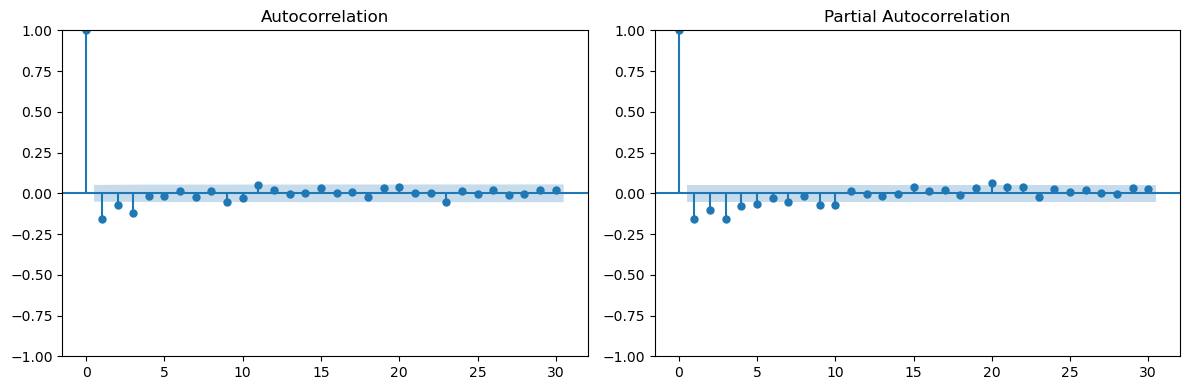

In [12]:
# ACF와 PACF 플롯
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(df_diff["meantemp"], lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(df_diff["meantemp"], lags=30, ax=axes[1])

plt.tight_layout()
plt.show()


In [1]:
# 변수 선언

p=0
q=1

### ARIMA 학습

/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


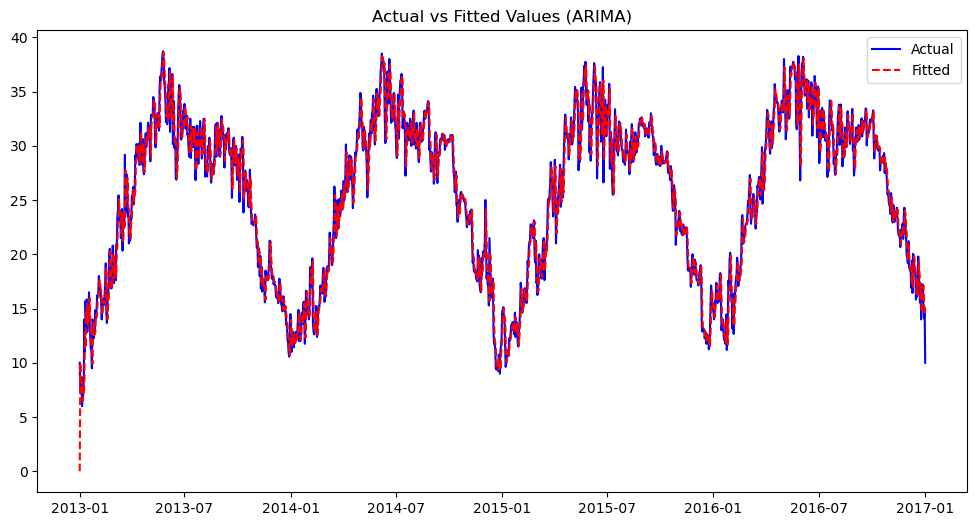

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["meantemp"], order=(p, 1, q))
model_fit = model.fit()

# 예측 수행
df["fitted"] = model_fit.fittedvalues

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df["meantemp"], label="Actual", color="blue")
plt.plot(df["fitted"], label="Fitted", color="red", linestyle="dashed")
plt.title("Actual vs Fitted Values (ARIMA)")
plt.legend()
plt.show()

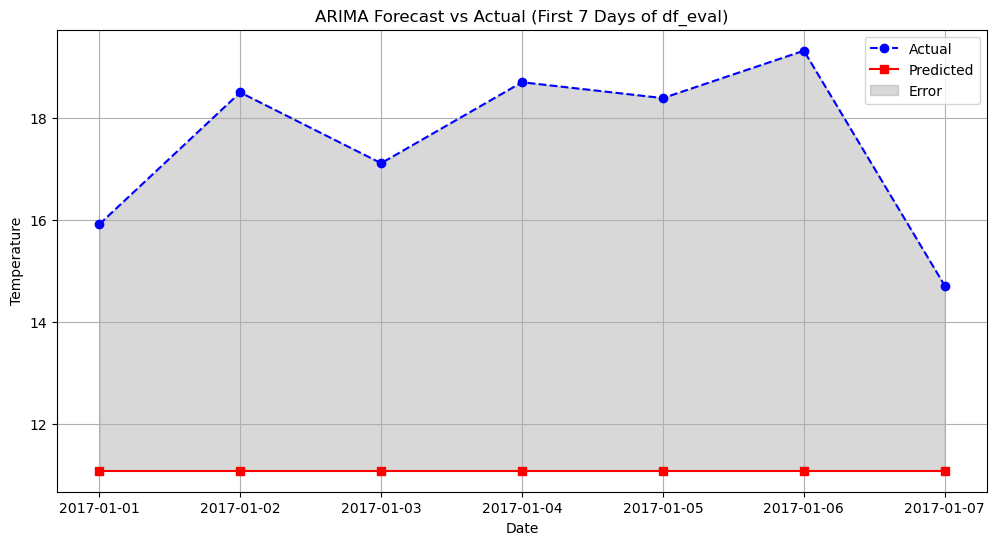

In [14]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

### AutoARIMA

아래는 자동으로 p,d,q 값을 계산해주는 auto_arima를 사용한 코드입니다.

In [9]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.6/654.6 kB 2.6 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pmdarima]2/3 [pmdarima]


In [15]:
from pmdarima import auto_arima

stepwise_model = auto_arima(df["meantemp"],
                            start_p=0, max_p=5,
                            start_q=0, max_q=5,
                            seasonal=False,
                            trace=True,  # 최적화 과정 출력
                            error_action="ignore",
                            suppress_warnings=True)

# 최적의 (p, d, q) 값 출력
print(f"\n Optimal (p, d, q): {stepwise_model.order}\n")

# 최적의 파라미터로 ARIMA 모델 학습
p, d, q = stepwise_model.order
model = ARIMA(df["meantemp"], order=(p, d, q))
model_fit = model.fit()

# 예측값 저장
df["fitted"] = model_fit.fittedvalues


/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5650.181, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5614.068, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5602.114, Time=0.09 sec


/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5648.181, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5544.460, Time=0.82 sec


/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5546.100, Time=0.82 sec


/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5546.168, Time=0.32 sec


/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5573.723, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5600.849, Time=0.12 sec


/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5546.314, Time=1.43 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5542.478, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5600.115, Time=0.06 sec


/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5612.068, Time=0.06 sec


/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5544.118, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5544.186, Time=0.18 sec


/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5571.729, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5598.850, Time=0.05 sec


/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5544.332, Time=0.50 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 5.280 seconds

 Optimal (p, d, q): (1, 1, 1)



/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jeong-yeon-u/anaconda3/envs/tobigs/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


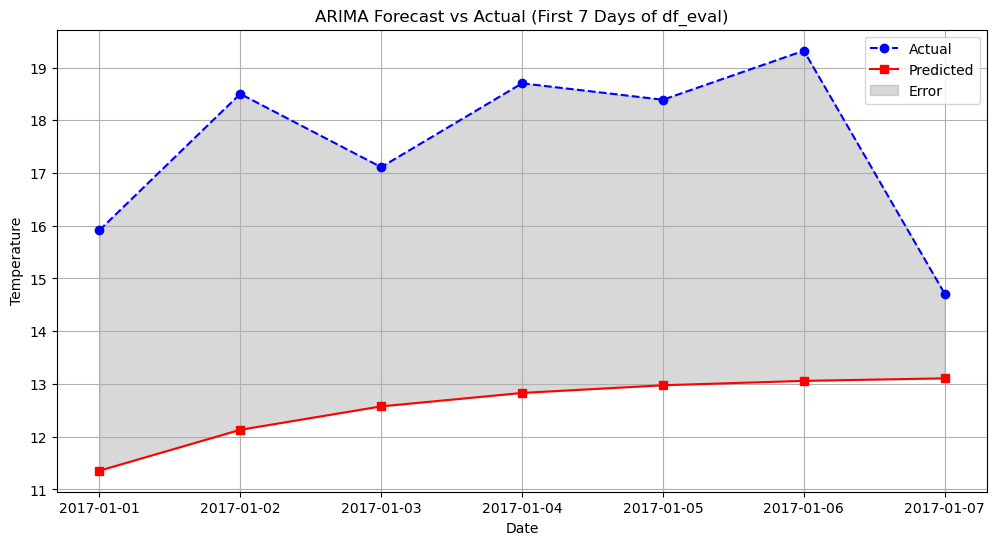

In [16]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()



---



## 💻 실습2 Dlinear

In [2]:
import pandas as pd
import numpy as np 

# 데이터 로드
train_df = pd.read_csv('/Users/jeong-yeon-u/Library/CloudStorage/GoogleDrive-wjddusdn1528@gmail.com/내 드라이브/dacon/open/Time_Series_hw_data_train (1).csv')
test_df = pd.read_csv('/Users/jeong-yeon-u/Library/CloudStorage/GoogleDrive-wjddusdn1528@gmail.com/내 드라이브/dacon/open/Time_Series_hw_data_test (1).csv')

# 날짜 컬럼을 제외한 데이터만 사용
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)

features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
train_values = train_df[features].values.astype(np.float32)
test_values = test_df[features].values.astype(np.float32)

**Q3**

- 30일간의 날씨 데이터를 이용해 7일 동안의 온도, 습도, 풍속, 대기압을 예측하고자 합니다. 아래 코드의 빈칸을 채워주세요. <br><br>


In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

# Sliding Window 전처리
def create_sequences(data, seq_len, pred_len):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_len):
        X.append(data[i:i+seq_len]) # 빈칸을 채워주세요
        y.append(data[i+seq_len:i+seq_len+pred_len])  # 빈칸을 채워주세요
    return np.array(X), np.array(y)


seq_len = 30 # 빈칸을 채워주세요(예측을 위해 사용할 time step 수)
pred_len = 7 # 빈칸을 채워주세요(실제 예측할 time step 수)
X_train, y_train = create_sequences(train_values, seq_len, pred_len)


# PyTorch Dataset 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

train_dataset = TimeSeriesDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

/var/folders/3g/83r5k72d1ygg7m9z3t6q3nxc0000gn/T/ipykernel_38636/2452587905.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(X, dtype=torch.float32)
/var/folders/3g/83r5k72d1ygg7m9z3t6q3nxc0000gn/T/ipykernel_38636/2452587905.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y, dtype=torch.float32)


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Dlinear 모델 선언

# 이동 평균을 이용한 추세 추출
class moving_avg(nn.Module):

    def __init__(self, kernel_size, stride):
        super(moving_avg, self).__init__()
        self.kernel_size = kernel_size # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # padding on the both ends of time series
        front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        x = torch.cat([front, x, end], dim=1)
        x = self.avg(x.permute(0, 2, 1))
        x = x.permute(0, 2, 1)
        return x

# 시계열 분해
class series_decomp(nn.Module):
    """
    Series decomposition block
    """
    def __init__(self, kernel_size):
        super(series_decomp, self).__init__()
        self.moving_avg = moving_avg(kernel_size, stride=1)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        res = x - moving_mean # 데이터에서 추세를 빼면 계절성 부분만 남음
        return res, moving_mean

# 모델
class Model(nn.Module):
    def __init__(self, configs):
        super(Model, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.individual = configs['individual'] # 특성마다 다른 선형 회귀를 적용할지 여부
        self.channels = configs['enc_in'] # 입력 및 출력되는 특성 수

        # Decomposition Kernel Size
        kernel_size = configs['kernel_size'] # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.decompsition = series_decomp(kernel_size)

        if self.individual:
            self.Linear_Seasonal = nn.ModuleList()
            self.Linear_Trend = nn.ModuleList()

            for i in range(self.channels):
                self.Linear_Seasonal.append(nn.Linear(self.seq_len, self.pred_len))
                self.Linear_Trend.append(nn.Linear(self.seq_len, self.pred_len))
        else:
            self.Linear_Seasonal = nn.Linear(self.seq_len, self.pred_len)
            self.Linear_Trend = nn.Linear(self.seq_len, self.pred_len)

    def forward(self, x):
        seasonal_init, trend_init = self.decompsition(x)
        seasonal_init, trend_init = seasonal_init.permute(0, 2, 1), trend_init.permute(0, 2, 1)

        if self.individual:
            seasonal_output = torch.zeros([seasonal_init.size(0), seasonal_init.size(1), self.pred_len], dtype=seasonal_init.dtype).to(seasonal_init.device)
            trend_output = torch.zeros([trend_init.size(0), trend_init.size(1), self.pred_len], dtype=trend_init.dtype).to(trend_init.device)

            for i in range(self.channels):
                seasonal_output[:, i, :] = self.Linear_Seasonal[i](seasonal_init[:, i, :])
                trend_output[:, i, :] = self.Linear_Trend[i](trend_init[:, i, :])
        else:
            seasonal_output = self.Linear_Seasonal(seasonal_init)
            trend_output = self.Linear_Trend(trend_init)

        x = seasonal_output + trend_output
        return x.permute(0, 2, 1)

**Q4**

- Dlinear 모델은 kernel, learning rate, individual, epoch 등 여러 하이퍼 파라미터가 존재합니다. 위의 하이퍼 파라미터를 직접 조정하시면서 평균 에러가 가장 낮게 나온 값을 작성해주세요. 마지막으로 ARIMA와 비교하여 어느 모델의 정확도가 더 높은 것 같은지 적어주세요.<br><br>

**A4**<br><br>
Kernel:  25
<br>
learning rate:  0.001
<br>
individual:  True
<br>
epoch: 50
<br><br>
정확도가 더 높은 모델: DLinear 모델 
이유 : ARIMA는 통계적 모델로서 데이터의 선형적 관계나 뚜렷한 계절성을 잘 포착하지만, 여러 변수 간의 복잡하고 비선형적인 패턴을 학습하는 데에는 한계가 있습니다. 반면 DLinear와 같은 딥러닝 기반 모델은 다변량 데이터 속의 복잡한 패턴을 더 효과적으로 학습할 수 있는 능력이 있습니다. 
특히, 날씨 데이터와 같이 다양한 요인이 서로에게 비선형적인 영향을 미치는 경우는 딥러닝 모델인 DLinear가 ARIMA보다 더 정교한 예측을 해 평균 에러가 더 낮을 것으로 기대됩니다. 

In [16]:
# Kernel과 individual의 경우 configs 값을 조정해주세요

configs = {
    'seq_len': seq_len,
    'pred_len': pred_len,
    'individual': True,
    'enc_in': len(features),  # 모든 특성 사용
    'kernel_size': 25
}
model = Model(configs)
optimizer = optim.Adam(model.parameters(), lr=0.001) # learning rate 조절
loss_fn = nn.MSELoss()

# 모델 학습
num_epochs = 50 # epoch 조절
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = loss_fn(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/50, Loss: 96952.7224
Epoch 2/50, Loss: 11348.6771
Epoch 3/50, Loss: 10819.2818
Epoch 4/50, Loss: 10490.8446
Epoch 5/50, Loss: 10218.2850
Epoch 6/50, Loss: 9977.7786
Epoch 7/50, Loss: 9755.4940
Epoch 8/50, Loss: 9566.9189
Epoch 9/50, Loss: 9429.2740
Epoch 10/50, Loss: 9307.1775
Epoch 11/50, Loss: 9200.0171
Epoch 12/50, Loss: 9100.7697
Epoch 13/50, Loss: 9029.4696
Epoch 14/50, Loss: 8984.1956
Epoch 15/50, Loss: 8908.8050
Epoch 16/50, Loss: 8840.5875
Epoch 17/50, Loss: 8839.8530
Epoch 18/50, Loss: 9023.7103
Epoch 19/50, Loss: 8837.4587
Epoch 20/50, Loss: 8771.2940
Epoch 21/50, Loss: 8746.1577
Epoch 22/50, Loss: 8766.2057
Epoch 23/50, Loss: 8755.8283
Epoch 24/50, Loss: 8757.3495
Epoch 25/50, Loss: 8692.7779
Epoch 26/50, Loss: 8724.3834
Epoch 27/50, Loss: 8724.1388
Epoch 28/50, Loss: 8730.0113
Epoch 29/50, Loss: 8711.4416
Epoch 30/50, Loss: 8730.4132
Epoch 31/50, Loss: 8720.7245
Epoch 32/50, Loss: 8709.9900
Epoch 33/50, Loss: 8733.6358
Epoch 34/50, Loss: 8713.2575
Epoch 35/50, Loss:

평균 에러: 5.237060546875


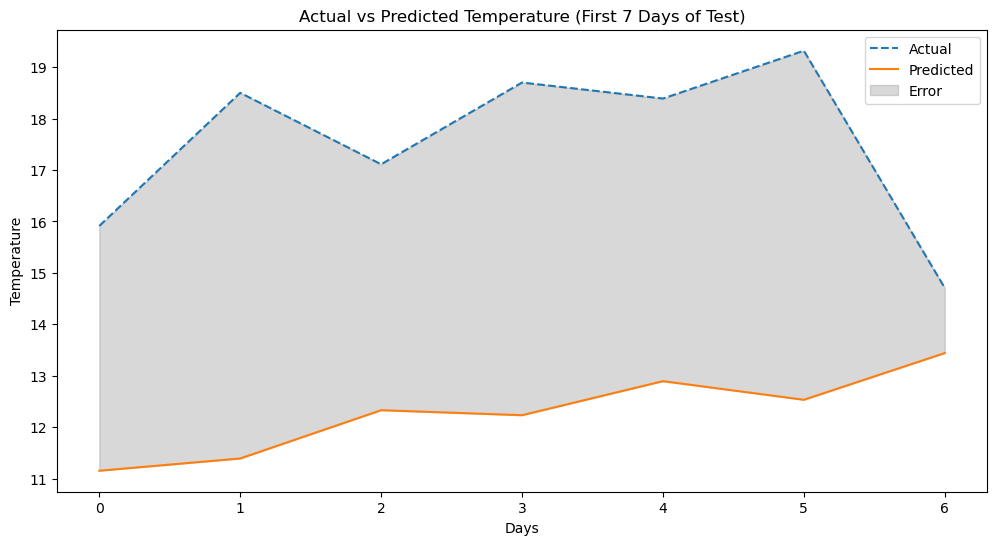

In [6]:
model.eval()
last_30_days = torch.tensor(train_values[-30:], dtype=torch.float32).unsqueeze(0)
with torch.no_grad():
    predictions = model(last_30_days).squeeze().numpy()

# 실제값 (온도만)
actuals = test_values[:7, 0]

# 예측값에서 온도만 선택
predictions_temp = predictions[:, 0]

# 차이 계산
error = actuals - predictions_temp

print(f"평균 에러: {error.mean()}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(7), actuals, label='Actual', linestyle='dashed')
plt.plot(range(7), predictions_temp, label='Predicted')
plt.fill_between(range(7), actuals, predictions_temp, color='gray', alpha=0.3, label='Error')
plt.title('Actual vs Predicted Temperature (First 7 Days of Test)')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()